Mens Tourney Prediction Analysis

I feel the following are important in determing a teams success in the tourney

1) Seeding
2) Strength of Conference
3) Individual team statistics
4) Experience



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
# import seaborn as sns
import time
import math

from sklearn.utils import shuffle
# from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
# from sklearn import preprocessing, metrics, ensemble, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import normalize

pd.set_option('display.max_columns', 999)
pd.options.display.float_format = '{:.6f}'.format

start_time = time.time()

In [170]:
#standard files

#df_tourney = pd.read_csv('NCAATourneyCompactResults.csv')
#df_season = pd.read_csv('RegularSeasonDetailedResults.csv')
#df_teams = pd.read_csv('Teams.csv')
#df_seeds = pd.read_csv('NCAATourneySeeds.csv')
#df_conferences = pd.read_csv('Conferences.csv')
#df_rankings = pd.read_csv('MasseyOrdinals.csv')
#df_sample_sub = pd.read_csv('SampleSubmissionStage1.csv')
#df_team_conferences = pd.read_csv('Teamconferences.csv')
#df_ConferenceTourneyGames = pd.read_csv('ConferenceTourneyGames.csv')

#my custom file


#df_tourney_experience = pd.read_csv('tourney_experience_senior_class.csv')
DATA_DIR = "C:/Users/osaka2/Documents/MEGA/Python/MarchMadness/"
# Kaggle locations
df_tourney = pd.read_csv(DATA_DIR + 'input/NCAATourneyCompactResults.csv')
df_season = pd.read_csv(DATA_DIR + 'input/RegularSeasonDetailedResults_Prelim2018.csv') # TODO update
df_teams = pd.read_csv(DATA_DIR + 'input/Teams.csv')
df_seeds = pd.read_csv(DATA_DIR + 'input/NCAATourneySeeds_SampleTourney2018.csv') # TODO update
df_conferences = pd.read_csv(DATA_DIR + 'input/Conferences.csv')
df_rankings = pd.read_csv(DATA_DIR + 'input/MasseyOrdinals_Prelim2018.csv') # TODO update
df_sample_sub = pd.read_csv(DATA_DIR + 'input/SampleSubmissionStage2_SampleTourney2018.csv') # TODO update
df_team_conferences = pd.read_csv(DATA_DIR + 'input/TeamConferences.csv')
df_ConferenceTourneyGames = pd.read_csv(DATA_DIR + 'input/ConferenceTourneyGames.csv')


#private data file

df_tourney_experience = pd.read_csv(DATA_DIR + 'additional/experience9.csv')

OSError: File b'C:/Users/osaka2/Documents/MEGA/Python/MarchMadness/additional/experience9.csv' does not exist

In [121]:
df_rankings.tail()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3426472,2018,114,ZAM,1460,134
3426473,2018,114,ZAM,1461,90
3426474,2018,114,ZAM,1462,13
3426475,2018,114,ZAM,1463,206
3426476,2018,114,ZAM,1464,329


In [17]:
# What is logloss (This is what the competition is based on)?

#The graph below shows the range of possible log loss values given a true observation (Prediction = 1). 

#As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, 
#however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications
#that are confident and wrong!

NameError: name 'sns' is not defined

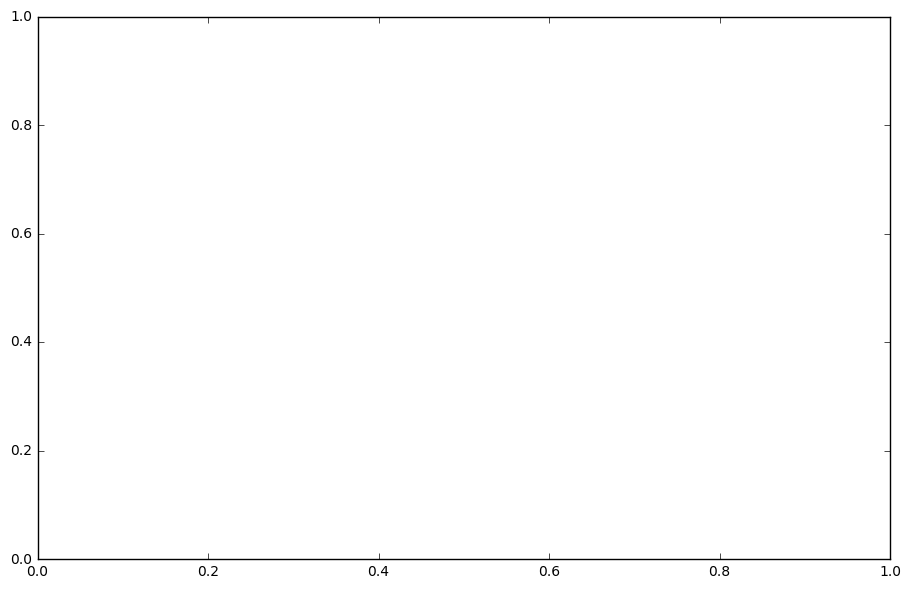

In [7]:
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  if true_label == 1:
    return -(math.log(p))
  else:
    return -(math.log(1 - p))

y = []
value = []
x = []

for i in range(1,100):
    
    value = logloss(1,i/100, eps=1e-15)
    y.append(value)
    x.append(i/100)

Graph = pd.DataFrame(np.array(x))    
Graph['Log_Loss'] =  np.array(y)  

f, ax = plt.subplots(figsize=(11, 7))
sns.regplot(x = Graph.iloc[:, 0:1], y = Graph['Log_Loss'], data=Graph)

In [15]:
df_season.head(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Possesions
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,69.888000
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,65.356800
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,61.382400
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,55.315200
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,60.768000


In [15]:
#Calculate Winning/losing Team Possesion Feature

#https://www.nbastuffer.com/analytics101/possession/


wPos = df_season.apply(lambda row: 0.96*(row.WFGA + row.WTO + 0.44*row.WFTA - row.WOR), axis=1)
lPos = df_season.apply(lambda row: 0.96*(row.LFGA + row.LTO + 0.44*row.LFTA - row.LOR), axis=1)

#two teams use almost the same number of possessions in a game
#(plus/minus one or two - depending on how quarters end)
#so let's just take the average

df_season['Possesions'] = (wPos+lPos)/2

In [18]:
df_season.head(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Possesions
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,69.888000
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,65.356800
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,61.382400
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,55.315200
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,60.768000


In [19]:
#Name Player Impact Estimate Definition PIE measures a player's overall statistical contribution
#against the total statistics in games they play in. PIE yields results which are
#comparable to other advanced statistics (e.g. PER) using a simple formula.
#Formula (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO)
# / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

#We will use this to measure Team Skill

wtmp = df_season.apply(lambda row: row.WScore + row.WFGM + row.WFTM - row.WFGA - row.WFTA + row.WDR + 0.5*row.WOR + row.WAst +row.WStl + 0.5*row.WBlk - row.WPF - row.WTO, axis=1)
ltmp = df_season.apply(lambda row: row.LScore + row.LFGM + row.LFTM - row.LFGA - row.LFTA + row.LDR + 0.5*row.LOR + row.LAst +row.LStl + 0.5*row.LBlk - row.LPF - row.LTO, axis=1) 

df_season['WPIE'] = wtmp/(wtmp + ltmp)
df_season['LPIE'] = ltmp/(wtmp + ltmp)

In [20]:
#Four factors statistic from the NBA

#https://www.nbastuffer.com/analytics101/four-factors/


#Effective Field Goal Percentage=(Field Goals Made) + 0.5*3P Field Goals Made))/(Field Goal Attempts)
#you have to put the ball in the bucket eventually

df_season['WeFGP'] = df_season.apply(lambda row:(row.WFGM + 0.5 * row.WFGM3) / row.WFGA, axis=1)      
df_season['LeFGP'] = df_season.apply(lambda row:(row.LFGM + 0.5 * row.LFGM3) / row.LFGA, axis=1) 

#Turnover Rate= Turnovers/(Field Goal Attempts + 0.44*Free Throw Attempts + Turnovers)
#he who doesnt turn the ball over wins games

df_season['WTOR'] = df_season.apply(lambda row: row.WTO / (row.WFGA + 0.44*row.WFTA + row.WTO), axis=1)
df_season['LTOR'] = df_season.apply(lambda row: row.LTO / (row.LFGA + 0.44*row.LFTA + row.LTO), axis=1)


#Offensive Rebounding Percentage = (Offensive Rebounds)/[(Offensive Rebounds)+(Opponent’s Defensive Rebounds)]
#You can win games controlling the offensive glass

df_season['WORP'] = df_season.apply(lambda row: row.WOR / (row.WOR + row.LDR), axis=1)
df_season['LORP'] = df_season.apply(lambda row: row.LOR / (row.LOR + row.WDR), axis=1)

#Free Throw Rate=(Free Throws Made)/(Field Goals Attempted) or Free Throws Attempted/Field Goals Attempted
#You got to get to the line to win close games

df_season['WFTAR'] = df_season.apply(lambda row: row.WFTA / row.WFGA, axis=1)
df_season['LFTAR'] = df_season.apply(lambda row: row.LFTA / row.LFGA, axis=1)

#4 Factors is weighted as follows
#1. Shooting (40%)
#2. Turnovers (25%)
#3. Rebounding (20%)
#4. Free Throws (15%)

df_season['W4Factor'] = df_season.apply(lambda row: .40*row.WeFGP + .25*row.WTOR + .20*row.WORP + .15*row.WFTAR, axis=1)
df_season['L4Factor'] = df_season.apply(lambda row: .40*row.LeFGP + .25*row.LTOR + .20*row.LORP + .15*row.LFTAR, axis=1)

In [21]:
#Offensive efficiency (OffRtg) =  (Points / Possessions)
#Every possession counts

df_season['WOffRtg'] = df_season.apply(lambda row: (row.WScore / row.Possesions), axis=1)
df_season['LOffRtg'] = df_season.apply(lambda row: (row.LScore / row.Possesions), axis=1)

#Defensive efficiency (DefRtg) = (Opponent points / Opponent possessions)
#defense wins championships

df_season['WDefRtg'] = df_season.LOffRtg
df_season['LDefRtg'] = df_season.WOffRtg

                        
#Assist Ratio : Percentage of team possessions that end in assists
#distribute the rock - dont go isolation all the time

df_season['WAstR'] = df_season.apply(lambda row: row.WAst / (row.WFGA + 0.44*row.WFTA + row.WAst + row.WTO), axis=1)
df_season['LAstR'] = df_season.apply(lambda row: row.LAst / (row.LFGA + 0.44*row.LFTA + row.LAst + row.LTO), axis=1)


#DREB% : Percentage of team defensive rebounds
#control your own glass

df_season['WDRP'] = df_season.apply(lambda row: row.WDR / (row.WDR + row.LOR), axis=1)
df_season['LDRP'] = df_season.apply(lambda row: row.LDR / (row.LDR + row.WOR), axis=1) 

#Free Throw Percentage
#Make your damn free throws

df_season['WFTPCT'] = df_season.apply(lambda row : 0 if row.WFTA < 1 else row.WFTM / row.WFTA, axis=1)
df_season['LFTPCT'] = df_season.apply(lambda row : 0 if row.LFTA < 1 else row.LFTM / row.LFTA, axis=1)

In [22]:
df_season.drop(['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF'], axis=1, inplace=True)
df_season.drop(['LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'], axis=1, inplace=True)

In [23]:
df_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Possesions,WPIE,LPIE,WeFGP,LeFGP,WTOR,LTOR,WORP,LORP,WFTAR,LFTAR,W4Factor,L4Factor,WOffRtg,LOffRtg,WDefRtg,LDefRtg,WAstR,LAstR,WDRP,LDRP,WFTPCT,LFTPCT
0,2003,10,1104,68,1328,62,N,0,69.888000,0.532847,0.467153,0.491379,0.433962,0.258659,0.223104,0.388889,0.294118,0.310345,0.415094,0.385546,0.350448,0.972985,0.887134,0.887134,0.972985,0.127551,0.090212,0.705882,0.611111,0.611111,0.727273
1,2003,10,1272,70,1393,63,N,0,65.356800,0.602339,0.397661,0.483871,0.402985,0.155950,0.136674,0.375000,0.416667,0.306452,0.298507,0.353504,0.323472,1.071044,0.963939,0.963939,1.071044,0.161031,0.073840,0.583333,0.625000,0.526316,0.450000
2,2003,11,1266,73,1437,61,N,0,61.382400,0.736434,0.263566,0.482759,0.321918,0.123824,0.126156,0.435897,0.543860,0.500000,0.315068,0.386239,0.316338,1.189266,0.993770,0.993770,1.189266,0.156642,0.086439,0.456140,0.564103,0.586207,0.608696
3,2003,11,1296,56,1457,50,N,0,55.315200,0.754717,0.245283,0.513158,0.428571,0.188561,0.254692,0.230769,0.472222,0.815789,0.306122,0.420926,0.375464,1.012380,0.903911,0.903911,1.012380,0.147374,0.107656,0.527778,0.769231,0.548387,0.533333
4,2003,11,1400,77,1208,71,N,0,60.768000,0.570732,0.429268,0.540984,0.435484,0.173439,0.119218,0.531250,0.488372,0.213115,0.435484,0.397970,0.366995,1.267114,1.168378,1.168378,1.267114,0.129422,0.125156,0.511628,0.468750,0.846154,0.629630


In [24]:
df_season_composite = pd.DataFrame()

#This will aggregate individual games into season totals for a team

#calculates wins and losses to get winning percentage

df_season_composite['WINS'] = df_season['WTeamID'].groupby([df_season['Season'], df_season['WTeamID']]).count()
df_season_composite['LOSSES'] = df_season['LTeamID'].groupby([df_season['Season'], df_season['LTeamID']]).count()
df_season_composite['WINPCT'] = df_season_composite['WINS'] / (df_season_composite['WINS'] + df_season_composite['LOSSES'])

# calculates averages for games team won

df_season_composite['WPIE'] = df_season['WPIE'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WeFGP'] = df_season['WeFGP'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WTOR'] = df_season['WTOR'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WORP'] = df_season['WORP'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WFTAR'] = df_season['WFTAR'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['W4Factor'] = df_season['W4Factor'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WOffRtg'] = df_season['WOffRtg'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WDefRtg'] = df_season['WDefRtg'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WAstR'] = df_season['WAstR'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WDRP'] = df_season['WDRP'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WFTPCT'] = df_season['WFTPCT'].groupby([df_season['Season'], df_season['WTeamID']]).mean()

# calculates averages for games team lost

df_season_composite['LPIE'] = df_season['LPIE'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LeFGP'] = df_season['LeFGP'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LTOR'] = df_season['LTOR'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LORP'] = df_season['LORP'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LFTAR'] = df_season['LFTAR'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['L4Factor'] = df_season['L4Factor'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LOffRtg'] = df_season['LOffRtg'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LDefRtg'] = df_season['LDefRtg'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LAstR'] = df_season['LAstR'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LDRP'] = df_season['LDRP'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LFTPCT'] = df_season['LFTPCT'].groupby([df_season['Season'], df_season['LTeamID']]).mean()

# calculates weighted average using winning percent to weight the statistic


df_season_composite['PIE'] = df_season_composite['WPIE'] * df_season_composite['WINPCT'] + df_season_composite['LPIE'] * (1 - df_season_composite['WINPCT'])
df_season_composite['FG_PCT'] = df_season_composite['WeFGP'] * df_season_composite['WINPCT'] + df_season_composite['LeFGP'] * (1 - df_season_composite['WINPCT'])
df_season_composite['TURNOVER_RATE'] = df_season_composite['WTOR'] * df_season_composite['WINPCT'] + df_season_composite['LTOR'] * (1 - df_season_composite['WINPCT'])
df_season_composite['OFF_REB_PCT'] = df_season_composite['WORP'] * df_season_composite['WINPCT'] + df_season_composite['LORP'] * (1 - df_season_composite['WINPCT'])
df_season_composite['FT_RATE'] = df_season_composite['WFTAR'] * df_season_composite['WINPCT'] + df_season_composite['LFTAR'] * (1 - df_season_composite['WINPCT'])
df_season_composite['4FACTOR'] = df_season_composite['W4Factor'] * df_season_composite['WINPCT'] + df_season_composite['L4Factor'] * (1 - df_season_composite['WINPCT'])
df_season_composite['OFF_EFF'] = df_season_composite['WOffRtg'] * df_season_composite['WINPCT'] + df_season_composite['LOffRtg'] * (1 - df_season_composite['WINPCT'])
df_season_composite['DEF_EFF'] = df_season_composite['WDefRtg'] * df_season_composite['WINPCT'] + df_season_composite['LDefRtg'] * (1 - df_season_composite['WINPCT'])
df_season_composite['ASSIST_RATIO'] = df_season_composite['WAstR'] * df_season_composite['WINPCT'] + df_season_composite['LAstR'] * (1 - df_season_composite['WINPCT'])
df_season_composite['DEF_REB_PCT'] = df_season_composite['WDRP'] * df_season_composite['WINPCT'] + df_season_composite['LDRP'] * (1 - df_season_composite['WINPCT'])
df_season_composite['FT_PCT'] = df_season_composite['WFTPCT'] * df_season_composite['WINPCT'] + df_season_composite['LFTPCT'] * (1 - df_season_composite['WINPCT'])

df_season_composite.reset_index(inplace = True)

In [25]:
#Kentucy and Witchita State went undefeated causing problems with the data since cant calculate average stats without WINPCT

df_season_composite[df_season_composite['LOSSES'].isnull()]

,Season,WTeamID,WINS,LOSSES,WINPCT,WPIE,WeFGP,WTOR,WORP,WFTAR,W4Factor,WOffRtg,WDefRtg,WAstR,WDRP,WFTPCT,LPIE,LeFGP,LTOR,LORP,LFTAR,L4Factor,LOffRtg,LDefRtg,LAstR,LDRP,LFTPCT,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT
4064,2014,1455,33,nan,nan,0.697612,0.523191,0.137994,0.353977,0.479304,0.386466,1.222681,0.974460,0.149764,0.747270,0.731159,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4211,2015,1246,34,nan,nan,0.809886,0.520134,0.137713,0.402745,0.451499,0.390756,1.221053,0.881479,0.158968,0.684470,0.719838,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [26]:
#Complete hack to fix the data

df_season_composite.loc[4064,'WINPCT'] = 1
df_season_composite.loc[4064,'LOSSES'] = 0
df_season_composite.loc[4064,'PIE'] = df_season_composite.loc[4064,'WPIE']
df_season_composite.loc[4064,'FG_PCT'] = df_season_composite.loc[4064,'WeFGP']
df_season_composite.loc[4064,'TURNOVER_RATE'] = df_season_composite.loc[4064,'WTOR']
df_season_composite.loc[4064,'OFF_REB_PCT'] = df_season_composite.loc[4064,'WORP']
df_season_composite.loc[4064,'FT_RATE'] = df_season_composite.loc[4064,'WFTAR']
df_season_composite.loc[4064,'4FACTOR'] = df_season_composite.loc[4064,'W4Factor']
df_season_composite.loc[4064,'OFF_EFF'] = df_season_composite.loc[4064,'WOffRtg']
df_season_composite.loc[4064,'DEF_EFF'] = df_season_composite.loc[4064,'WDefRtg']
df_season_composite.loc[4064,'ASSIST_RATIO'] = df_season_composite.loc[4064,'WAstR']
df_season_composite.loc[4064,'DEF_REB_PCT'] = df_season_composite.loc[4064,'WDRP']
df_season_composite.loc[4064,'FT_PCT'] = df_season_composite.loc[4064,'WFTPCT']

df_season_composite.loc[4211,'WINPCT'] = 1
df_season_composite.loc[4211,'LOSSES'] = 0
df_season_composite.loc[4211,'PIE'] = df_season_composite.loc[4211,'WPIE']
df_season_composite.loc[4211,'FG_PCT'] = df_season_composite.loc[4211,'WeFGP']
df_season_composite.loc[4211,'TURNOVER_RATE'] = df_season_composite.loc[4211,'WTOR']
df_season_composite.loc[4211,'OFF_REB_PCT'] = df_season_composite.loc[4211,'WORP']
df_season_composite.loc[4211,'FT_RATE'] = df_season_composite.loc[4211,'WFTAR']
df_season_composite.loc[4211,'4FACTOR'] = df_season_composite.loc[4211,'W4Factor']
df_season_composite.loc[4211,'OFF_EFF'] = df_season_composite.loc[4211,'WOffRtg']
df_season_composite.loc[4211,'DEF_EFF'] = df_season_composite.loc[4211,'WDefRtg']
df_season_composite.loc[4211,'ASSIST_RATIO'] = df_season_composite.loc[4211,'WAstR']
df_season_composite.loc[4211,'DEF_REB_PCT'] = df_season_composite.loc[4211,'WDRP']
df_season_composite.loc[4211,'FT_PCT'] = df_season_composite.loc[4211,'WFTPCT']

In [27]:
#we only need the final summary stats

df_season_composite.drop(['WINS','WPIE','WeFGP','WTOR','WORP','WFTAR','W4Factor','WOffRtg','WDefRtg','WAstR','WDRP','WFTPCT'], axis=1, inplace=True)
df_season_composite.drop(['LOSSES','LPIE','LeFGP','LTOR','LORP','LFTAR','L4Factor','LOffRtg','LDefRtg','LAstR','LDRP','LFTPCT'], axis=1, inplace=True)

In [28]:
df_season_composite.head()

,Season,WTeamID,WINPCT,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT
0,2003,1102,0.428571,0.488599,0.584407,0.193121,0.168235,0.446693,0.382694,1.094137,1.091964,0.178061,0.630384,0.642402
1,2003,1103,0.481481,0.509717,0.536564,0.159805,0.305803,0.465135,0.385508,1.166466,1.163578,0.159196,0.626998,0.735271
2,2003,1104,0.607143,0.536514,0.475785,0.167275,0.371256,0.372350,0.362236,1.089621,1.029131,0.130983,0.686897,0.705168
3,2003,1105,0.269231,0.415050,0.457983,0.207792,0.335166,0.359501,0.356100,0.985661,1.054833,0.138288,0.641434,0.709598
4,2003,1106,0.464286,0.527568,0.481697,0.213721,0.349480,0.307563,0.362140,0.986712,0.991377,0.126527,0.679342,0.623158


In [29]:
#a little housekeeping to make easier to graph correlation matrix

columns = list(df_season_composite.columns.values) 
columns.pop(columns.index('WINPCT')) 
columns.append('WINPCT')
df_season_composite = df_season_composite[columns]
df_season_composite.rename(columns={'WTeamID':'TeamID'}, inplace=True)
df_season_composite.head()

,Season,TeamID,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT
0,2003,1102,0.488599,0.584407,0.193121,0.168235,0.446693,0.382694,1.094137,1.091964,0.178061,0.630384,0.642402,0.428571
1,2003,1103,0.509717,0.536564,0.159805,0.305803,0.465135,0.385508,1.166466,1.163578,0.159196,0.626998,0.735271,0.481481
2,2003,1104,0.536514,0.475785,0.167275,0.371256,0.372350,0.362236,1.089621,1.029131,0.130983,0.686897,0.705168,0.607143
3,2003,1105,0.415050,0.457983,0.207792,0.335166,0.359501,0.356100,0.985661,1.054833,0.138288,0.641434,0.709598,0.269231
4,2003,1106,0.527568,0.481697,0.213721,0.349480,0.307563,0.362140,0.986712,0.991377,0.126527,0.679342,0.623158,0.464286


In [ ]:
#This shows we have some good predictors of winning percentage

#the PIE variable is very powerfully correlated with winning percentage
#also we can see turnovers will kill you as well as having a bad defense


corrmatrix = df_season_composite.iloc[:, 2:].corr()

f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corrmatrix, vmax=.8, cbar=True, annot=True, square=True);

In [ ]:
#Strength of Schedule

#We will use the RPI ranking of the teams before entering the tourney to get a measure of strength of schedule.

#Rating Percentage Index (RPI) Formula=.25*(Team’s Winning Percentage)+
#.50*(Opponents’  Average Winning Percentage)+0.25*(Opponents’ Opponents’  Average Winning Percentage)

#The rating percentage index, commonly known as the RPI, is a quantity used to rank sports teams based upon
#a team's wins and losses and its strength of schedule. It is one of the sports rating systems by which NCAA basketball,
#baseball, softball, hockey, soccer, lacrosse, and volleyball teams are ranked.

#The final pre-tournament rankings each year have a RankingDayNum of 133.
#and can thus be used to make predictions of the games from the NCAA® tournament

In [130]:
df_RPI2018 = df_rankings[df_rankings['SystemName'] == 'RPI']
df_RPI2018 = df_RPI2018[df_RPI2018['Season'] == 2018]
last2018 = sorted(df_RPI2018['RankingDayNum'].unique())[-1]
df_RPI2018 = df_RPI2018[df_RPI2018['RankingDayNum'] == last2018]
df_RPI2018.shape

(351, 5)

In [136]:
df_RPI = df_rankings[df_rankings['SystemName'] == 'RPI']
df_RPI_final = df_RPI[df_RPI['RankingDayNum'] == 133]
df_RPI_final = pd.concat([df_RPI_final, df_RPI2018])
df_RPI_final.drop(labels=['RankingDayNum', 'SystemName'], inplace=True, axis=1)
print(df_RPI_final.shape)
df_RPI_final.tail()

(5473, 3)


,Season,TeamID,OrdinalRank
3418726,2018,1460,103
3418727,2018,1461,83
3418728,2018,1462,3
3418729,2018,1463,217
3418730,2018,1464,315


In [137]:
# Lets look at the conference tourney games to see if their is a correlation between a team doing well
# in the conference tourney and having that carry over to winning games in the big dance 

# Lets calculate the number of games a team played in the conference tournament

#df_ConferenceTourneyGames.head()
df_ConferenceTourneyGames = pd.read_csv(DATA_DIR + 'input/ConferenceTourneyGames.csv')

ConferenceTourney_SummaryW = pd.DataFrame()
ConferenceTourney_SummaryL = pd.DataFrame()
ConferenceTourney_SummaryW['WINS'] = df_ConferenceTourneyGames['WTeamID'].groupby([df_ConferenceTourneyGames['Season'], df_ConferenceTourneyGames['WTeamID']]).count()
ConferenceTourney_SummaryL['LOSSES'] = df_ConferenceTourneyGames['LTeamID'].groupby([df_ConferenceTourneyGames['Season'], df_ConferenceTourneyGames['LTeamID']]).count()
##ConferenceTourney_SummaryW['LOSSES'].fillna(0, inplace=True)
#ConferenceTourney_SummaryW['GAMES'] = ConferenceTourney_SummaryW['WINS'] + ConferenceTourney_SummaryW['LOSSES']
ConferenceTourney_SummaryW.reset_index(inplace = True)
ConferenceTourney_SummaryL.reset_index(inplace = True)
ConferenceTourney_SummaryW.rename(columns={'WTeamID':'TeamID'}, inplace=True)
ConferenceTourney_SummaryL.rename(columns={'LTeamID':'TeamID'}, inplace=True)

ConferenceTourney_Summary = pd.merge(left=ConferenceTourney_SummaryW, right=ConferenceTourney_SummaryL, how='outer', on=['Season', 'TeamID'])
ConferenceTourney_Summary['LOSSES'].fillna(0, inplace=True) 
ConferenceTourney_Summary['GAMES'] = ConferenceTourney_Summary['LOSSES'] + ConferenceTourney_Summary['WINS']

ConferenceTourney_Summary.head()

,Season,TeamID,WINS,LOSSES,GAMES
0,2001.000000,1104.000000,1.000000,1.000000,2.000000
1,2001.000000,1106.000000,3.000000,0.000000,3.000000
2,2001.000000,1108.000000,2.000000,1.000000,3.000000
3,2001.000000,1111.000000,1.000000,1.000000,2.000000
4,2001.000000,1114.000000,1.000000,1.000000,2.000000


In [138]:
# Now lets do the same thing for the actual tourney

NCAATourney_SummaryW = pd.DataFrame()
NCAATourney_SummaryL = pd.DataFrame()
NCAATourney_SummaryW['WINS'] = df_tourney['WTeamID'].groupby([df_tourney['Season'], df_tourney['WTeamID']]).count()
NCAATourney_SummaryL['LOSSES'] = df_tourney['LTeamID'].groupby([df_tourney['Season'], df_tourney['LTeamID']]).count()
##NCAATourney_SummaryW['LOSSES'].fillna(0, inplace=True)
#NCAATourney_SummaryW['GAMES'] = NCAATourney_SummaryW['WINS'] + NCAATourney_SummaryW['LOSSES']
NCAATourney_SummaryW.reset_index(inplace = True)
NCAATourney_SummaryL.reset_index(inplace = True)
NCAATourney_SummaryW.rename(columns={'WTeamID':'TeamID'}, inplace=True)
NCAATourney_SummaryL.rename(columns={'LTeamID':'TeamID'}, inplace=True)

NCAATourney_Summary = pd.merge(left=NCAATourney_SummaryW, right=NCAATourney_SummaryL, how='outer', on=['Season', 'TeamID'])
NCAATourney_Summary['LOSSES'].fillna(0, inplace=True) 
NCAATourney_Summary['GAMES'] = NCAATourney_Summary['LOSSES'] + NCAATourney_Summary['WINS']

NCAATourney_Summary.head()

,Season,TeamID,WINS,LOSSES,GAMES
0,1985.000000,1104.000000,2.000000,1.000000,3.000000
1,1985.000000,1116.000000,1.000000,1.000000,2.000000
2,1985.000000,1120.000000,2.000000,1.000000,3.000000
3,1985.000000,1130.000000,2.000000,1.000000,3.000000
4,1985.000000,1181.000000,1.000000,1.000000,2.000000


In [139]:
Hot_team = pd.merge(left=NCAATourney_Summary, right=ConferenceTourney_Summary, how='left', on=['Season', 'TeamID'])

Hot_team['GAMES_y'].fillna(0, inplace=True) 
Hot_team.rename(columns={'GAMES_x':'Conf_Games'}, inplace=True)
Hot_team.rename(columns={'GAMES_y':'Tourney_Games'}, inplace=True)
Hot_team.drop(labels=['WINS_x', 'LOSSES_x', 'WINS_y', 'LOSSES_y'], inplace=True, axis=1)

Hot_team = Hot_team[Hot_team['Tourney_Games'] > 0]
Hot_team.iloc[:,2:4].corr()

,Conf_Games,Tourney_Games
Conf_Games,1.000000,0.048207
Tourney_Games,0.048207,1.000000


In [140]:
#No correlation here so we will not use this feature in the model

In [141]:
#Lets look at the team conferences file

df_team_conferences = df_team_conferences[df_team_conferences['Season'] > 2002]

df_team_conferences.head()

,Season,TeamID,ConfAbbrev
5407,2003,1125,a_sun
5408,2003,1144,a_sun
5409,2003,1194,a_sun
5410,2003,1205,a_sun
5411,2003,1209,a_sun


In [142]:
# For Strength of schedule measure we will take the conference average of RPI and assign it to each team in the conference
# All things being equal a team with a higher Conference RPI should win the game

df_team_conferences_stage = pd.merge(left=df_team_conferences, right=df_RPI_final, how='left', on=['Season', 'TeamID'])
df_team_conferences_stage.head(5)

,Season,TeamID,ConfAbbrev,OrdinalRank
0,2003,1125,a_sun,143.000000
1,2003,1144,a_sun,317.000000
2,2003,1194,a_sun,293.000000
3,2003,1205,a_sun,299.000000
4,2003,1209,a_sun,218.000000


In [143]:
#calculates the Conference RPI

df_team_conference_strength = pd.DataFrame()

df_team_conference_strength['Conf_Strength'] = df_team_conferences_stage['OrdinalRank'].groupby([df_team_conferences_stage['Season'], df_team_conferences_stage['ConfAbbrev']]).mean()
df_team_conference_strength.reset_index(inplace=True)
df_team_conference_strength.head()

,Season,ConfAbbrev,Conf_Strength
0,2003,a_sun,206.750000
1,2003,a_ten,128.583333
2,2003,acc,56.111111
3,2003,aec,217.111111
4,2003,big_east,77.214286


In [144]:
# Now we assign the Conference Strength back to each team

df_team_conferences_stage= pd.merge(left=df_team_conferences_stage, right=df_team_conference_strength, how='left', on=['Season', 'ConfAbbrev'])
df_team_conferences_stage.drop(labels=['OrdinalRank', 'ConfAbbrev'], inplace=True, axis=1)

df_team_conferences_stage.head()

,Season,TeamID,Conf_Strength
0,2003,1125,206.750000
1,2003,1144,206.750000
2,2003,1194,206.750000
3,2003,1205,206.750000
4,2003,1209,206.750000


In [145]:
#Get seeds of teams for all tourney games

df_seeds.head()

,Season,TeamID,Seed,Conf_Strength
0,1985,1207,1,nan
1,1985,1210,2,nan
2,1985,1228,3,nan
3,1985,1260,4,nan
4,1985,1374,5,nan


In [146]:
# Convert string to an integer

df_seeds['seed_int'] = df_seeds['Seed'].apply( lambda x : int(x[1:3]) )
df_seeds.drop(labels=['Seed'], inplace=True, axis=1) 
df_seeds.rename(columns={'seed_int':'Seed'},inplace=True)

# Merge in the Conference Strength variable here

df_seeds= pd.merge(left=df_seeds, right=df_team_conferences_stage, how='left', on=['Season', 'TeamID'])

df_seeds.head()

TypeError: 'int' object is not subscriptable

In [147]:
#Create team features for all seasons

#ranks only start since 2003

df_seeds_final = df_seeds[df_seeds['Season'] > 2002]

#2 step merge

df_tourney_stage = pd.merge(left=df_seeds_final, right=df_RPI_final, how='left', on=['Season', 'TeamID'])
df_tourney_final = pd.merge(left=df_tourney_stage, right=df_season_composite, how='left', on=['Season', 'TeamID'])

df_tourney_final.head()

,Season,TeamID,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT
0,2003,1328,1,56.833333,3,0.604965,0.512124,0.155078,0.347284,0.332030,0.362880,1.141774,0.970563,0.153606,0.709854,0.714351,0.800000
1,2003,1448,2,56.111111,7,0.637398,0.511972,0.178941,0.429724,0.472499,0.406344,1.181855,1.021376,0.147679,0.687237,0.755330,0.827586
2,2003,1393,3,77.214286,9,0.604162,0.515151,0.160408,0.385242,0.393873,0.382292,1.159225,1.015128,0.146059,0.630790,0.687824,0.827586
3,2003,1257,4,97.857143,11,0.633058,0.528861,0.156505,0.356053,0.418922,0.384719,1.183940,0.988304,0.162239,0.664037,0.690997,0.800000
4,2003,1280,5,50.500000,24,0.643001,0.521359,0.197467,0.383446,0.323860,0.383178,1.099648,0.948850,0.154033,0.695785,0.666941,0.700000


In [171]:
#I couldnt figure out how to manipulate/calculate the way I wanted so I exported to Excel and am reimporting it back in here.

#df_tourney_experience = pd.read_csv('tourney_experience_senior_class.csv')

#This indicates the number of tourney games that the senior class would have played in going in to this
#years tourney (basically games played in the prior 3 tourneys) Using it as a gage of tourney experience of the team. 
#All things being equal between two #teams the team with more experience in the tourney I feel would win the game.

df_tourney_experience.tail()

,TeamID,Season,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
292,1459,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,2,2,1
293,1460,2018,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
294,1461,2018,3,4,4,1,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,1,1,1
295,1462,2018,3,4,4,5,6,5,4,2,3,1,3,3,3,1,1,3,5,8,6,5,3,7,9,10,7,7,4,4,4,6,9
296,1463,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [172]:
#this function looks up the number of games for a year/team combination

def get_wins(year, teamid):
    # print("year, teamid",year, teamid )
    
    row_id = df_tourney_experience[df_tourney_experience['TeamID'] == teamid]
    # print(row_id.shape)
    if row_id.shape[0]==0:
        # print("year, teamid",year, teamid )
        games = 0
    else:
        row_id = row_id.index[0]
    
        column_id = df_tourney_experience.columns.get_loc(str(year))
        games = df_tourney_experience.iloc[row_id,column_id]
      
    return games

In [173]:
#iterates thru the dataframe to build another single column dataframe by calling the function

result = []
             

for row in df_tourney_final.iterrows():
    
    years = (df_tourney_final['Season'])
    teams = (df_tourney_final['TeamID'])
    
print(len(years))
print(len(teams))

1064
1064


In [174]:
for i in range(len(df_tourney_final)):
    # print(i)
    matrix = ((years[i], teams[i]))
    result.append(get_wins(*matrix))
    

team_experience = pd.DataFrame(result, columns=['experience']) 

team_experience.head()

,experience
0,8
1,3
2,5
3,1
4,2


In [175]:
#merges them together 

df_tourney_final = pd.concat((df_tourney_final, team_experience), axis=1)

df_tourney_final.head()

,Season,TeamID,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,experience,experience
0,2003,1328,1,56.833333,3,0.604965,0.512124,0.155078,0.347284,0.332030,0.362880,1.141774,0.970563,0.153606,0.709854,0.714351,0.800000,8,8
1,2003,1448,2,56.111111,7,0.637398,0.511972,0.178941,0.429724,0.472499,0.406344,1.181855,1.021376,0.147679,0.687237,0.755330,0.827586,3,3
2,2003,1393,3,77.214286,9,0.604162,0.515151,0.160408,0.385242,0.393873,0.382292,1.159225,1.015128,0.146059,0.630790,0.687824,0.827586,5,5
3,2003,1257,4,97.857143,11,0.633058,0.528861,0.156505,0.356053,0.418922,0.384719,1.183940,0.988304,0.162239,0.664037,0.690997,0.800000,1,1
4,2003,1280,5,50.500000,24,0.643001,0.521359,0.197467,0.383446,0.323860,0.383178,1.099648,0.948850,0.154033,0.695785,0.666941,0.700000,2,2


In [176]:
df_tourney_experience.loc[(df_tourney_experience.TeamID==1365)]

,TeamID,Season,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
216,1365,2018,1,1,1,0,0,0,2,2,3,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
len(df_tourney_experience['TeamID'].unique()), len(df_tourney_final['TeamID'].unique())

(297, 245)

In [178]:
#generate teams in the tourney

df_tourney.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_tourney = pd.merge(left=df_tourney, right=df_seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
df_tourney = pd.merge(left=df_tourney, right=df_seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
df_tourney.drop(labels=['TeamID_x', 'TeamID_y', 'Conf_Strength_x', 'Conf_Strength_y' ], inplace=True, axis=1)
df_tourney.rename(columns={'Seed_x':'WSeed', 'Seed_y':'LSeed'},inplace=True)
df_tourney.head()

ValueError: labels ['Conf_Strength_x' 'Conf_Strength_y'] not contained in axis

In [156]:
#Great graph showing how seeding has extreme effect in early rounds

# No 16 seed has ever beaten a number 1 seed (absence of +15 values)
# Very rarely does a #15 seed beat a #2 seed (low value of +13 values)

# this needs to be in our model

df_tourney['SeedDiff'] = df_tourney['WSeed'] - df_tourney['LSeed']
sns.countplot(df_tourney['SeedDiff'])

NameError: name 'sns' is not defined

In [157]:
#quick and dirty to see how good a predictor Seed difference is

df_wins = pd.DataFrame()
df_wins['SeedDiff'] = df_tourney['SeedDiff']
df_wins['Result'] = 1

df_losses = pd.DataFrame()
df_losses['SeedDiff'] = -df_tourney['SeedDiff']
df_losses['Result'] = 0

df_predictions = pd.concat((df_wins, df_losses))
df_predictions.head()

,SeedDiff,Result
0,1,1
1,5,1
2,-15,1
3,1,1
4,-11,1


In [158]:
#setup the data

X_train = df_predictions.SeedDiff.values.reshape(-1,1)
y_train = df_predictions.Result.values
X_train, y_train = shuffle(X_train, y_train)

In [159]:
#use Logistic regression with Gridsearch for parameter tuning

logreg = LogisticRegression(random_state=0)
params = {'C': np.logspace(start=-5, stop=3, num=9)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True, cv=10, )
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

NameError: name 'GridSearchCV' is not defined

In [160]:
#model is accurately reflecting the low probability of major upsets based on seeds differentials

X = np.arange(-15, 15).reshape(-1, 1)  # this creates the range of seed differentials
preds = clf.predict_proba(X)[:,1]  # the 1 signifies winning

plt.plot(X, preds)
plt.xlabel('Team1 seed - Team2 seed')
plt.ylabel('P(Team1 will win)')

NameError: name 'clf' is not defined

In [161]:
preds

NameError: name 'preds' is not defined

In [162]:
#Seeding alone seems to predict 70% accurately

train_acc = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
        
print('Training Accuracy: %.2f%%' % (100 * train_acc))

NameError: name 'clf' is not defined

In [163]:
df_tourney.head()

,Season,WTeamID,LTeamID,WSeed,LSeed,SeedDiff
0,1985,1116,1234,9,8,1
1,1985,1120,1345,11,6,5
2,1985,1207,1250,1,16,-15
3,1985,1229,1425,9,8,1
4,1985,1242,1325,3,14,-11


In [164]:
#sample submission file

df_sample_sub.head()

,ID,Pred
0,2018_1104_1112,0.500000
1,2018_1104_1113,0.500000
2,2018_1104_1116,0.500000
3,2018_1104_1120,0.500000
4,2018_1104_1124,0.500000


In [165]:
#This generates a submission file for 2014-2017 using the simple Seeds model

n_test_games = len(df_sample_sub)

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

X_test = np.zeros(shape=(n_test_games, 1))

for ii, row in df_sample_sub.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    team1 = df_tourney_final[(df_tourney_final.TeamID == t1) & (df_tourney_final.Season == year)].Seed.values[0]
    team2 = df_tourney_final[(df_tourney_final.TeamID == t2) & (df_tourney_final.Season == year)].Seed.values[0]
    diff_seed = team1 - team2
    X_test[ii, 0] = diff_seed

      
preds = clf.predict_proba(X_test)[:,1]

df_sample_sub['Pred'] = preds

df_sample_sub.to_csv('SeedModel.csv', index=False)

df_sample_sub.head()

NameError: name 'clf' is not defined

In [179]:
df_tourney_final.head()

,Season,TeamID,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,experience,experience
0,2003,1328,1,56.833333,3,0.604965,0.512124,0.155078,0.347284,0.332030,0.362880,1.141774,0.970563,0.153606,0.709854,0.714351,0.800000,8,8
1,2003,1448,2,56.111111,7,0.637398,0.511972,0.178941,0.429724,0.472499,0.406344,1.181855,1.021376,0.147679,0.687237,0.755330,0.827586,3,3
2,2003,1393,3,77.214286,9,0.604162,0.515151,0.160408,0.385242,0.393873,0.382292,1.159225,1.015128,0.146059,0.630790,0.687824,0.827586,5,5
3,2003,1257,4,97.857143,11,0.633058,0.528861,0.156505,0.356053,0.418922,0.384719,1.183940,0.988304,0.162239,0.664037,0.690997,0.800000,1,1
4,2003,1280,5,50.500000,24,0.643001,0.521359,0.197467,0.383446,0.323860,0.383178,1.099648,0.948850,0.154033,0.695785,0.666941,0.700000,2,2


In [167]:
#Generate a list of all matchups in the tourney since 2003

#df_tourney_list = pd.read_csv('NCAATourneyCompactResults.csv')
df_tourney_list = pd.read_csv(DATA_DIR + 'input/NCAATourneyCompactResults.csv')
df_tourney_list.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_tourney_list = df_tourney_list[df_tourney_list['Season'] > 2002]
df_tourney_list.reset_index(inplace = True, drop=True)
df_tourney_list.head()

,Season,WTeamID,LTeamID
0,2003,1421,1411
1,2003,1112,1436
2,2003,1113,1272
3,2003,1141,1166
4,2003,1143,1301


In [180]:
df_tourney_final
df_tourney_final.to_csv(DATA_DIR + "additional/df_tourney_final2.csv")

In [110]:
#gets the features for the winning team

df_model_winners = pd.merge(left=df_tourney_list, right=df_tourney_final ,how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
df_model_winners.drop(labels=['TeamID'], inplace=True, axis=1)
df_model_winners.head()

,Season,WTeamID,LTeamID,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,experience
0,2003,1421,1411,16,242.750000,186.000000,0.440672,0.489800,0.196965,0.347184,0.377214,0.371180,1.064194,1.166926,0.135985,0.625619,0.766142,0.448276,0
1,2003,1112,1436,1,93.500000,2.000000,0.654693,0.517632,0.160953,0.394027,0.387965,0.384291,1.165755,0.962944,0.160719,0.680560,0.701154,0.892857,11
2,2003,1113,1272,10,93.500000,32.000000,0.585160,0.517334,0.170036,0.398080,0.468561,0.399343,1.147626,1.042992,0.158358,0.683950,0.675667,0.620690,0
3,2003,1141,1166,11,151.846154,44.000000,0.569291,0.572835,0.223575,0.359177,0.481836,0.429139,1.155036,1.067316,0.158267,0.662368,0.762741,0.793103,0
4,2003,1143,1301,8,93.500000,33.000000,0.556130,0.524098,0.173660,0.322310,0.348311,0.369763,1.106737,1.037344,0.162401,0.692086,0.688632,0.724138,3


In [111]:
#gets the features for the losing team

df_model_losers = pd.merge(left=df_tourney_list, right=df_tourney_final ,how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
df_model_losers.drop(labels=['TeamID'], inplace=True, axis=1)
df_model_losers.head()

,Season,WTeamID,LTeamID,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,experience
0,2003,1421,1411,16,267.500000,217.000000,0.547692,0.503036,0.184551,0.360133,0.529491,0.398802,1.075908,1.052196,0.144831,0.681723,0.613745,0.600000,0
1,2003,1112,1436,16,217.111111,144.000000,0.561326,0.494732,0.180141,0.380016,0.356274,0.372372,1.081808,1.004410,0.151546,0.732898,0.649708,0.655172,0
2,2003,1113,1272,7,97.857143,26.000000,0.597778,0.498337,0.163772,0.366803,0.396624,0.373132,1.112507,0.982265,0.164072,0.683904,0.628299,0.793103,0
3,2003,1141,1166,6,163.100000,23.000000,0.644084,0.567455,0.167750,0.339233,0.354147,0.389888,1.198708,0.977462,0.171703,0.681826,0.689707,0.878788,4
4,2003,1143,1301,9,56.111111,53.000000,0.541945,0.534189,0.185834,0.308813,0.387496,0.380021,1.130049,1.062601,0.158700,0.681661,0.778148,0.600000,2


In [112]:
#This generates the differences between the features between winning and losing team and assigns 1 as the classifier for winning

df_model_winner_diff = (df_model_winners.iloc[:, 3:] - df_model_losers.iloc[:, 3:])
df_model_winner_diff['result'] = 1
df_model_winner_diff = pd.merge(left=df_model_winner_diff, right=df_tourney_list, left_index=True, right_index=True, how='inner')

#This generates the differences between the features between losing and winning team and assigns 0 as the classifier for losing

df_model_loser_diff = (df_model_losers.iloc[:, 3:] - df_model_winners.iloc[:, 3:])
df_model_loser_diff['result'] = 0
df_model_loser_diff = pd.merge(left=df_model_loser_diff, right=df_tourney_list, left_index=True, right_index=True, how='inner')

In [113]:
df_model_winner_diff.head()

,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,experience,result,Season,WTeamID,LTeamID
0,0,-24.750000,-31.000000,-0.107021,-0.013235,0.012414,-0.012949,-0.152277,-0.027622,-0.011714,0.114730,-0.008846,-0.056104,0.152397,-0.151724,0,1,2003,1421,1411
1,-15,-123.611111,-142.000000,0.093367,0.022900,-0.019188,0.014010,0.031691,0.011919,0.083948,-0.041466,0.009173,-0.052338,0.051446,0.237685,11,1,2003,1112,1436
2,3,-4.357143,6.000000,-0.012618,0.018997,0.006264,0.031277,0.071937,0.026211,0.035119,0.060726,-0.005714,0.000045,0.047369,-0.172414,0,1,2003,1113,1272
3,5,-11.253846,21.000000,-0.074793,0.005381,0.055825,0.019944,0.127689,0.039251,-0.043672,0.089854,-0.013436,-0.019458,0.073034,-0.085684,-4,1,2003,1141,1166
4,-1,37.388889,-20.000000,0.014185,-0.010092,-0.012174,0.013497,-0.039185,-0.010259,-0.023312,-0.025257,0.003702,0.010425,-0.089516,0.124138,1,1,2003,1143,1301


In [114]:
df_model_loser_diff.head()

,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,experience,result,Season,WTeamID,LTeamID
0,0,24.750000,31.000000,0.107021,0.013235,-0.012414,0.012949,0.152277,0.027622,0.011714,-0.114730,0.008846,0.056104,-0.152397,0.151724,0,0,2003,1421,1411
1,15,123.611111,142.000000,-0.093367,-0.022900,0.019188,-0.014010,-0.031691,-0.011919,-0.083948,0.041466,-0.009173,0.052338,-0.051446,-0.237685,-11,0,2003,1112,1436
2,-3,4.357143,-6.000000,0.012618,-0.018997,-0.006264,-0.031277,-0.071937,-0.026211,-0.035119,-0.060726,0.005714,-0.000045,-0.047369,0.172414,0,0,2003,1113,1272
3,-5,11.253846,-21.000000,0.074793,-0.005381,-0.055825,-0.019944,-0.127689,-0.039251,0.043672,-0.089854,0.013436,0.019458,-0.073034,0.085684,4,0,2003,1141,1166
4,1,-37.388889,20.000000,-0.014185,0.010092,0.012174,-0.013497,0.039185,0.010259,0.023312,0.025257,-0.003702,-0.010425,0.089516,-0.124138,-1,0,2003,1143,1301


In [115]:
df_predictions_tourney = pd.concat((df_model_winner_diff, df_model_loser_diff), axis=0)

df_predictions_tourney.sort_values('Season', inplace=True)

df_predictions_tourney.reset_index(inplace = True, drop=True)

In [116]:
df_predictions_tourney.head()

,Seed,Conf_Strength,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,experience,result,Season,WTeamID,LTeamID
0,0,-24.750000,-31.000000,-0.107021,-0.013235,0.012414,-0.012949,-0.152277,-0.027622,-0.011714,0.114730,-0.008846,-0.056104,0.152397,-0.151724,0,1,2003,1421,1411
1,11,92.585714,46.000000,-0.013858,-0.014261,0.011557,-0.052423,0.032148,-0.008478,-0.036868,-0.022519,-0.002358,0.027260,0.100614,-0.034483,-5,0,2003,1393,1264
2,-1,-24.954545,9.000000,0.082039,0.067915,0.003750,0.025868,-0.113316,0.016280,0.055471,-0.009768,0.039910,-0.004268,-0.103694,0.034562,-1,0,2003,1345,1261
3,13,159.452381,95.000000,-0.154728,-0.025687,-0.007815,0.001559,-0.096460,-0.026386,-0.013971,0.158266,-0.018119,-0.032008,0.083997,-0.189247,-3,0,2003,1338,1447
4,5,146.916667,37.000000,0.032360,0.069025,-0.003349,-0.055668,-0.040919,0.009501,0.090988,0.011822,0.037968,0.091727,0.036850,0.125160,-4,0,2003,1329,1335


In [117]:
df_predictions_tourney.shape

(1962, 20)

In [ ]:
#reorder column to make it easier to group features together

temp= df_predictions_tourney['Conf_Strength']
df_predictions_tourney.drop(labels=['Conf_Strength'], axis=1,inplace = True)
df_predictions_tourney.insert(0, 'Conf_Strength', temp)

df_predictions_tourney.head()

In [ ]:
# The plan is to test out 7 different models using Grid Search Cross Validation

#1 -  Ranks  -   This will be the RPI plus Seed

#2 -  Experience  - This will be the experience feature only

#3 -  Stats -  This will be the seasons teams statistics features

#4 -  Conference Strength -  This will be the Conference Strength feature only

#5 -  Full -  encompassing all features of models 1, 2, and 3

#6 - An ensemble model with the features being the actual probabilties of models 1, 2, 3 and 4

#7 - An ensemble model which calculates a weighted average probability with the weights
#  based on the predictive power of the 4 learner models

In [ ]:
# Lets test out the predictive power of the team statistic features on the training data before we begin full modeling

from sklearn.feature_selection import SelectPercentile, f_classif

X_features_stats = df_predictions_tourney.iloc[:1426, 3:14]
y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2014]

selector = SelectPercentile(f_classif, percentile=100)
selector.fit(X_features_stats, y)
p_scores = (selector.pvalues_) 
F_scores = (selector.scores_)

df_significance = pd.DataFrame({"Feature": X_features_stats.columns, "p_value":p_scores , "F_score":F_scores})

df_significance

In [ ]:
# Based on the above we will drop DEF_REB_PCT and FT_PCT as their p values are > 0.05 and thus we cant rule
# out the null hypothesis.  We will also drop FT_RATE as they doesn't seem to have much predictive power with
# the lower F_score as well.

# drop from predictions file used for training analysis

df_predictions_tourney.drop(labels=['DEF_REB_PCT', 'FT_PCT', 'FT_RATE' ], inplace=True, axis=1)

# drop from team statistics file used for building tourney testing analysis

df_tourney_final.drop(labels=['DEF_REB_PCT', 'FT_PCT', 'FT_RATE' ], inplace=True, axis=1)

In [ ]:
# Lets split the entire dataset into training/test sets and into feature categories for modeling

labels = df_predictions_tourney['result']
IDs = df_predictions_tourney.iloc[:, 15:]
features = df_predictions_tourney.iloc[:, 0:13]                  # model 5
features_rank = df_predictions_tourney.iloc[:, 1:3]              # model 1
features_experience = df_predictions_tourney.iloc[:, 12:13]      # model 2
features_stats = df_predictions_tourney.iloc[:, 3:12]            # model 3
features_conference = df_predictions_tourney.iloc[:, 0:1]        # model 4

# Test data set split (2014-1017 onward which corresponds from row 1426 to the end)

labels_submission = df_predictions_tourney['result'][df_predictions_tourney['Season'] > 2013]
IDs_submission = df_predictions_tourney.iloc[1426:, 15:]
features_submission = df_predictions_tourney.iloc[1426:,  0:13]

# Training data set split (2003 thru 2013 which is from the beginning thru row 1425)

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2014]
IDs_training = df_predictions_tourney.iloc[:1426, 15:]
X_features = df_predictions_tourney.iloc[:1426, 0:13]
X_features_rank = df_predictions_tourney.iloc[:1426, 1:3]
X_features_experience = df_predictions_tourney.iloc[:1426, 12:13]
X_features_stats = df_predictions_tourney.iloc[:1426, 3:12]
X_features_conference = df_predictions_tourney.iloc[:1426, 0:1]

In [ ]:
# Lets test out the predictive power of the Seeding and RPI features on the training data before we begin full modeling

from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=100)
selector.fit(X_features_rank, y)
p_scores = (selector.pvalues_) 
F_scores = (selector.scores_)

df_significance = pd.DataFrame({"Feature": X_features_rank.columns, "p_value":p_scores , "F_score":F_scores})

df_significance

In [ ]:
# Both ranking stats are powerful predictors so we will keep them!

In [ ]:
# Lets test out the predictive power of the experience feature on the training data before we begin full modeling

from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=100)
selector.fit(X_features_experience, y)
p_scores = (selector.pvalues_) 
F_scores = (selector.scores_)

df_significance = pd.DataFrame({"Feature":X_features_experience.columns, "p_value":p_scores , "F_score":F_scores})

df_significance

In [ ]:
# Experience is a factor as well. Keep it!

In [ ]:
# Lets test out the predictive power of the conference strength feature on the training data before we begin full modeling

from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=100)
selector.fit(X_features_conference, y)
p_scores = (selector.pvalues_) 
F_scores = (selector.scores_)

df_significance = pd.DataFrame({"Feature":X_features_conference.columns, "p_value":p_scores , "F_score":F_scores})

df_significance

In [ ]:
# Conference Strength is a factor. Keep it!

In [ ]:
# Lets test out the predictive power of team ID's on the training data before we begin full modeling

from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=100)
selector.fit(IDs_training, y)
p_scores = (selector.pvalues_) 
F_scores = (selector.scores_)

df_significance = pd.DataFrame({"Feature":IDs_training.columns, "p_value":p_scores , "F_score":F_scores})

df_significance

In [ ]:
# As we would expect and hoped for it adds no value.  This was just a sanity check of the code.

In [ ]:
# Training for Model #1 (Experience)

#split the training data further for cross validation

X_train, X_test, y_train, y_test = train_test_split(X_features_experience, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

#Intiating Classifiers

clf1 = LogisticRegression()

clf3 = XGBClassifier()

clf4 = DecisionTreeClassifier() 

clf5 = RandomForestClassifier()

# Setting up the parameter grids

param_grid1 = [{'clf1__C': list(np.logspace(start=-5, stop=3, num=9))}]

param_grid3 = [{'learning_rate' : [0.1, 0.3],
                'max_depth': [3, 6],
                'min_child_weight': list(range(1, 3))}]

param_grid4 = [{'max_depth': list(range(3, 6)),
                'criterion': ['gini', 'entropy'],
                'min_samples_leaf': [20, 50]}]

param_grid5 = [{'max_depth': list(range(1, 5)),
                'criterion': ['gini', 'entropy'],
                'min_samples_split' : [2, 3]}]

# Building the pipelines

pipe1 = Pipeline([('std', StandardScaler()),('clf1', clf1)])

pipe3 = Pipeline([('std', StandardScaler()),('clf3', clf3)])

pipe4 = Pipeline([('std', StandardScaler()),('clf4', clf4)])

pipe5 = Pipeline([('std', StandardScaler()),('clf5', clf5)])


# Setting up multiple GridSearchCV objects, 1 for each algorithm

gridcvs = {}

inner_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)
outer_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)

for pgrid, est, name in zip((param_grid1, param_grid3, param_grid4, param_grid5),
                            (pipe1, clf3, clf4, clf5,),
                            ('Logistic', 'XGBoost', 'DTree', 'Random Forest')):
    
    #First loop runs GridSearch and does Cross validation to find the best parameters

    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='neg_log_loss',
                       cv=outer_cv,
                       verbose=0,
                       refit=True,
                       return_train_score=False)
    
    gcv.fit(X_train, y_train)
    
    gridcvs[name] = gcv
    
    print(name)
    print()
    print(gcv.best_estimator_)
    print()
    print('Best score on Grid Search Cross Validation is %.5f%%' % (gcv.best_score_))
    print()
    results = pd.DataFrame(gcv.cv_results_)
      

#Inner loop runs Cross Val Score on tuned parameter model to determine accuracy of fit        

    # for name, gs_est in sorted(gridcvs.items()):
    
    nested_score = 0
    nested_score = cross_val_score(gcv, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=inner_cv,
                                  scoring='neg_log_loss')
                                
    
    print('Name, Log Loss, Std Dev, based on Best Parameter Model using Cross Validation Scoring')
    print('%s | %.2f %.2f' % (name,  nested_score.mean(),  nested_score.std() * 100,))
    print()
    
    
    #Generate predictions and probabilities
    
    best_algo = gcv    

    best_algo.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

    print('Training Accuracy: %.2f%%' % (100 * train_acc))
    print('Test Accuracy: %.2f%%' % (100 * test_acc))
    print()
    
    # prints classification report and confusion matrix
    
    predictions = best_algo.predict(X_test)
    probability = best_algo.predict_proba(X_test)
    print(classification_report(y_test,predictions))
    print()
    print(confusion_matrix(y_test,predictions))
    print()

In [ ]:
# Model 1 analysis

# Logistic - Best score on Grid Search Cross Validation is -0.64378%
# XGBoost - Best score on Grid Search Cross Validation is -0.65592%
# DTree -   Best score on Grid Search Cross Validation is -0.64823%
# RForest - Best score on Grid Search Cross Validation is -0.64469%

#We will chose Logistic here as it is good at picking out winners (True Positive Rate) vs RForest

In [ ]:
# Training for Model #2 (Ranks)

#split the training data further for cross validation

X_train, X_test, y_train, y_test = train_test_split(X_features_rank, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

#Intiating Classifiers

clf1 = LogisticRegression()

clf3 = XGBClassifier()

clf4 = DecisionTreeClassifier() 

clf5 = RandomForestClassifier()

# Setting up the parameter grids

param_grid1 = [{'clf1__C': list(np.logspace(start=-5, stop=3, num=9))}]

param_grid3 = [{'learning_rate' : [0.1, 0.3],
                'max_depth': [3, 6],
                'min_child_weight': list(range(1, 3))}]

param_grid4 = [{'max_depth': list(range(3, 6)),
                'criterion': ['gini', 'entropy'],
                'min_samples_leaf': [20, 50]}]

param_grid5 = [{'max_depth': list(range(1, 5)),
                'criterion': ['gini', 'entropy'],
                'min_samples_split' : [2, 3]}]

# Building the pipelines

pipe1 = Pipeline([('std', StandardScaler()),('clf1', clf1)])

pipe3 = Pipeline([('std', StandardScaler()),('clf3', clf3)])

pipe4 = Pipeline([('std', StandardScaler()),('clf4', clf4)])

pipe5 = Pipeline([('std', StandardScaler()),('clf5', clf5)])


# Setting up multiple GridSearchCV objects, 1 for each algorithm

gridcvs = {}

inner_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)
outer_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)

for pgrid, est, name in zip((param_grid1, param_grid3, param_grid4, param_grid5),
                            (pipe1, clf3, clf4, clf5,),
                            ('Logistic', 'XGBoost', 'DTree', 'Random Forest')):
    
    #First loop runs GridSearch and does Cross validation to find the best parameters

    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='neg_log_loss',
                       cv=outer_cv,
                       verbose=0,
                       refit=True,
                       return_train_score=False)
    
    gcv.fit(X_train, y_train)
    
    gridcvs[name] = gcv
    
    print(name)
    print()
    print(gcv.best_estimator_)
    print()
    print('Best score on Grid Search Cross Validation is %.5f%%' % (gcv.best_score_))
    print()
    results = pd.DataFrame(gcv.cv_results_)
      

#Inner loop runs Cross Val Score on tuned parameter model to determine accuracy of fit        

    # for name, gs_est in sorted(gridcvs.items()):
    
    nested_score = 0
    nested_score = cross_val_score(gcv, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=inner_cv,
                                  scoring='neg_log_loss')
                                
    
    print('Name, Log Loss, Std Dev, based on Best Parameter Model using Cross Validation Scoring')
    print('%s | %.2f %.2f' % (name,  nested_score.mean(),  nested_score.std() * 100,))
    print()
    
    
    #Generate predictions and probabilities
    
    best_algo = gcv    

    best_algo.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

    print('Training Accuracy: %.2f%%' % (100 * train_acc))
    print('Test Accuracy: %.2f%%' % (100 * test_acc))
    print()
    
    # prints classification report and confusion matrix
    
    predictions = best_algo.predict(X_test)
    probability = best_algo.predict_proba(X_test)
    print(classification_report(y_test,predictions))
    print()
    print(confusion_matrix(y_test,predictions))
    print()

In [ ]:
# Model 2 Analysis

# Logistic - Best score on Grid Search Cross Validation is -0.54360%
# XGBoost - Best score on Grid Search Cross Validation is -0.55679%
# DTree -   Best score on Grid Search Cross Validation is -0.57824%
# RForest - Best score on Grid Search Cross Validation is -0.54537%

# Logistic and RForest are very close again but RForest has a little higher accuracy

# We will choose Logistic

In [ ]:
# Training for Model #3 (Stats)

#split the training data further for cross validation

X_train, X_test, y_train, y_test = train_test_split(X_features_stats, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

#Intiating Classifiers

clf1 = LogisticRegression()

clf3 = XGBClassifier(n_estimators=30)

clf4 = DecisionTreeClassifier() 

clf5 = RandomForestClassifier()

# Setting up the parameter grids

param_grid1 = [{'clf1__C': list(np.logspace(start=-5, stop=3, num=9))}]

param_grid3 = [{'learning_rate' : [0.1, 0.3],
                'max_depth': [3, 6],
                'min_child_weight': list(range(1, 3))}]

param_grid4 = [{'max_depth': list(range(3, 6)),
                'criterion': ['gini', 'entropy'],
                'min_samples_leaf': [20, 50]}]

param_grid5 = [{'max_depth': list(range(1, 5)),
                'criterion': ['gini', 'entropy'],
                'min_samples_split' : [2, 3]}]

# Building the pipelines

pipe1 = Pipeline([('std', StandardScaler()),('clf1', clf1)])

pipe3 = Pipeline([('std', StandardScaler()),('clf3', clf3)])

pipe4 = Pipeline([('std', StandardScaler()),('clf4', clf4)])

pipe5 = Pipeline([('std', StandardScaler()),('clf5', clf5)])


# Setting up multiple GridSearchCV objects, 1 for each algorithm

gridcvs = {}

inner_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)
outer_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)

for pgrid, est, name in zip((param_grid1, param_grid3, param_grid4, param_grid5),
                            (pipe1, clf3, clf4, clf5,),
                            ('Logistic', 'XGBoost', 'DTree', 'Random Forest')):
    
    #First loop runs GridSearch and does Cross validation to find the best parameters

    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='neg_log_loss',
                       cv=outer_cv,
                       verbose=0,
                       refit=True,
                       return_train_score=False)
    
    gcv.fit(X_train, y_train)
    
    gridcvs[name] = gcv
    
    print(name)
    print()
    print(gcv.best_estimator_)
    print()
    print('Best score on Grid Search Cross Validation is %.5f%%' % (gcv.best_score_))
    print()
    results = pd.DataFrame(gcv.cv_results_)
      

#Inner loop runs Cross Val Score on tuned parameter model to determine accuracy of fit        

    # for name, gs_est in sorted(gridcvs.items()):
    
    nested_score = 0
    nested_score = cross_val_score(gcv, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=inner_cv,
                                  scoring='neg_log_loss')
                                
    
    print('Name, Log Loss, Std Dev, based on Best Parameter Model using Cross Validation Scoring')
    print('%s | %.2f %.2f' % (name,  nested_score.mean(),  nested_score.std() * 100,))
    print()
    
    
    #Generate predictions and probabilities
    
    best_algo = gcv    

    best_algo.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

    print('Training Accuracy: %.2f%%' % (100 * train_acc))
    print('Test Accuracy: %.2f%%' % (100 * test_acc))
    print()
    
    # prints classification report and confusion matrix
    
    predictions = best_algo.predict(X_test)
    probability = best_algo.predict_proba(X_test)
    print(classification_report(y_test,predictions))
    print()
    print(confusion_matrix(y_test,predictions))
    print()

In [ ]:
#Model 3 Analysis

# Logistic -Best score on Grid Search Cross Validation is -0.57541%
# XGBoost - Best score on Grid Search Cross Validation is -0.60065%
# DTree -   Best score on Grid Search Cross Validation is -0.63439%
# RForest - Best score on Grid Search Cross Validation is -0.60063%

# Logistic is the winner here.  XGBoost has high accuracy in training but way lower in test due to overfitting.

# We will choose Logistic

In [ ]:
# Training for Model #4 (Conference Strength)

#split the training data further for cross validation

X_train, X_test, y_train, y_test = train_test_split(X_features_conference, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

#Intiating Classifiers

clf1 = LogisticRegression()

clf3 = XGBClassifier()

clf4 = DecisionTreeClassifier() 

clf5 = RandomForestClassifier()

# Setting up the parameter grids

param_grid1 = [{'clf1__C': list(np.logspace(start=-5, stop=3, num=9))}]

param_grid3 = [{'learning_rate' : [0.1, 0.3],
                'max_depth': [3, 6],
                'min_child_weight': list(range(1, 3))}]

param_grid4 = [{'max_depth': list(range(3, 6)),
                'criterion': ['gini', 'entropy'],
                'min_samples_leaf': [20, 50]}]

param_grid5 = [{'max_depth': list(range(1, 5)),
                'criterion': ['gini', 'entropy'],
                'min_samples_split' : [2, 3]}]

# Building the pipelines

pipe1 = Pipeline([('std', StandardScaler()),('clf1', clf1)])

pipe3 = Pipeline([('std', StandardScaler()),('clf3', clf3)])

pipe4 = Pipeline([('std', StandardScaler()),('clf4', clf4)])

pipe5 = Pipeline([('std', StandardScaler()),('clf5', clf5)])


# Setting up multiple GridSearchCV objects, 1 for each algorithm

gridcvs = {}

inner_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)
outer_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)

for pgrid, est, name in zip((param_grid1, param_grid3, param_grid4, param_grid5),
                            (pipe1, clf3, clf4, clf5,),
                            ('Logistic', 'XGBoost', 'DTree', 'Random Forest')):
    
    #First loop runs GridSearch and does Cross validation to find the best parameters

    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='neg_log_loss',
                       cv=outer_cv,
                       verbose=0,
                       refit=True,
                       return_train_score=False)
    
    gcv.fit(X_train, y_train)
    
    gridcvs[name] = gcv
    
    print(name)
    print()
    print(gcv.best_estimator_)
    print()
    print('Best score on Grid Search Cross Validation is %.5f%%' % (gcv.best_score_))
    print()
    results = pd.DataFrame(gcv.cv_results_)
      

#Inner loop runs Cross Val Score on tuned parameter model to determine accuracy of fit        

    # for name, gs_est in sorted(gridcvs.items()):
    
    nested_score = 0
    nested_score = cross_val_score(gcv, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=inner_cv,
                                  scoring='neg_log_loss')
                                
    
    print('Name, Log Loss, Std Dev, based on Best Parameter Model using Cross Validation Scoring')
    print('%s | %.2f %.2f' % (name,  nested_score.mean(),  nested_score.std() * 100,))
    print()
    
    
    #Generate predictions and probabilities
    
    best_algo = gcv    

    best_algo.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

    print('Training Accuracy: %.2f%%' % (100 * train_acc))
    print('Test Accuracy: %.2f%%' % (100 * test_acc))
    print()
    
    # prints classification report and confusion matrix
    
    predictions = best_algo.predict(X_test)
    probability = best_algo.predict_proba(X_test)
    print(classification_report(y_test,predictions))
    print()
    print(confusion_matrix(y_test,predictions))
    print()

In [ ]:
# Model 4 analysis

# Logistic -Best score on Grid Search Cross Validation is -0.60571%
# XGBoost - Best score on Grid Search Cross Validation is -0.61737%
# DTree -   Best score on Grid Search Cross Validation is -0.61198%
# RForest - Best score on Grid Search Cross Validation is -0.60562%

# # We will choose Random Forest for this model - good at picking out losers (High Specificity)
#this can counter balance Model which 1 which had high True Positive (High Recall)

In [ ]:
# Training for Model #5 (Full)

#split the training data further for cross validation

X_train, X_test, y_train, y_test = train_test_split(X_features, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

#Intiating Classifiers

clf1 = LogisticRegression()

clf3 = XGBClassifier()

clf4 = DecisionTreeClassifier() 

clf5 = RandomForestClassifier()

# Setting up the parameter grids

param_grid1 = [{'clf1__C': list(np.logspace(start=-5, stop=3, num=9))}]

param_grid3 = [{'learning_rate' : [0.1, 0.3],
                'max_depth': [3, 6],
                'min_child_weight': list(range(1, 3))}]

param_grid4 = [{'max_depth': list(range(3, 6)),
                'criterion': ['gini', 'entropy'],
                'min_samples_leaf': [20, 50]}]

param_grid5 = [{'max_depth': list(range(1, 5)),
                'criterion': ['gini', 'entropy'],
                'min_samples_split' : [2, 3]}]

# Building the pipelines

pipe1 = Pipeline([('std', StandardScaler()),('clf1', clf1)])

pipe3 = Pipeline([('std', StandardScaler()),('clf3', clf3)])

pipe4 = Pipeline([('std', StandardScaler()),('clf4', clf4)])

pipe5 = Pipeline([('std', StandardScaler()),('clf5', clf5)])


# Setting up multiple GridSearchCV objects, 1 for each algorithm

gridcvs = {}

inner_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)
outer_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)

for pgrid, est, name in zip((param_grid1, param_grid3, param_grid4, param_grid5),
                            (pipe1, clf3, clf4, clf5,),
                            ('Logistic', 'XGBoost', 'DTree', 'Random Forest')):
    
    #First loop runs GridSearch and does Cross validation to find the best parameters

    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='neg_log_loss',
                       cv=outer_cv,
                       verbose=0,
                       refit=True,
                       return_train_score=False)
    
    gcv.fit(X_train, y_train)
    
    gridcvs[name] = gcv
    
    print(name)
    print()
    print(gcv.best_estimator_)
    print()
    print('Best score on Grid Search Cross Validation is %.5f%%' % (gcv.best_score_))
    print()
    results = pd.DataFrame(gcv.cv_results_)
      

#Inner loop runs Cross Val Score on tuned parameter model to determine accuracy of fit        

    # for name, gs_est in sorted(gridcvs.items()):
    
    nested_score = 0
    nested_score = cross_val_score(gcv, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=inner_cv,
                                  scoring='neg_log_loss')
                                
    
    print('Name, Log Loss, Std Dev, based on Best Parameter Model using Cross Validation Scoring')
    print('%s | %.2f %.2f' % (name,  nested_score.mean(),  nested_score.std() * 100,))
    print()
    
    
    #Generate predictions and probabilities
    
    best_algo = gcv    

    best_algo.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

    print('Training Accuracy: %.2f%%' % (100 * train_acc))
    print('Test Accuracy: %.2f%%' % (100 * test_acc))
    print()
    
    # prints classification report and confusion matrix
    
    predictions = best_algo.predict(X_test)
    probability = best_algo.predict_proba(X_test)
    print(classification_report(y_test,predictions))
    print()
    print(confusion_matrix(y_test,predictions))
    print()

In [ ]:
# Model 5 analysis

# Logistic -Best score on Grid Search Cross Validation is -0.53239%
# XGBoost - Best score on Grid Search Cross Validation is -0.56486%
# DTree -   Best score on Grid Search Cross Validation is -0.56361%
# RForest - Best score on Grid Search Cross Validation is -0.55288%

# Models do better than 50/50 and much better than Experience model

# Logistic is the winner here.  XGBoost has high accuracy in training but way lower in test due to overfitting.

# We will choose Logistic for this model

# This model has the best performance of the 5 models so we will submit this as one of our models

In [ ]:
# This sets up the data so we can make predictions year by year.  

predictions_2014 = df_sample_sub[:2278]
predictions_2015 = df_sample_sub[2278:4556]
predictions_2016 = df_sample_sub[4556:6833]
predictions_2017 = df_sample_sub[6833:]

Length2014 = len(df_predictions_tourney[df_predictions_tourney['Season'] < 2015])
Length2015 = len(df_predictions_tourney[df_predictions_tourney['Season'] < 2016])
Length2016 = len(df_predictions_tourney[df_predictions_tourney['Season'] < 2017])
Length2017 = len(df_predictions_tourney[df_predictions_tourney['Season'] < 2018])

In [ ]:
#this gets the training data (all historical data up to the year 2014)

n_test_games= len(predictions_2014)

columns = df_tourney_final.columns.get_values()
 

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2014.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2014 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2014.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2014['Conf_Strength']
Predictions_2014.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2014.insert(0, 'Conf_Strength', temp)


# Main model

clf = LogisticRegression(C=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(features.iloc[:(Length2014), 0:13])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2015]

clf.fit(X_scaled, y) 

Predictions_2014_scaled = scaler.transform(Predictions_2014)
preds = clf.predict_proba(Predictions_2014_scaled)[:,1]

predictions_2014['Pred'] = preds


#df_sample_sub.to_csv('predictions2014.csv', index=False)

In [ ]:
#this gets the training data (all historical data up to the year 2015)

n_test_games= len(predictions_2015)

columns = df_tourney_final.columns.get_values()

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2015.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2015 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2015.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2015['Conf_Strength']
Predictions_2015.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2015.insert(0, 'Conf_Strength', temp)


# Main model

clf = LogisticRegression(C=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(features.iloc[:(Length2015), 0:13])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2016]

clf.fit(X_scaled, y) 

Predictions_2015_scaled = scaler.transform(Predictions_2015)
preds = clf.predict_proba(Predictions_2015_scaled)[:,1]

predictions_2015['Pred'] = preds


#df_sample_sub.to_csv('predictions2015.csv', index=False)

In [ ]:
#this gets the training data (all historical data up to the year 2016)

n_test_games= len(predictions_2016)

columns = df_tourney_final.columns.get_values()

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2016.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2016 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2016.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2016['Conf_Strength']
Predictions_2016.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2016.insert(0, 'Conf_Strength', temp)


# Main model

clf = LogisticRegression(C=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(features.iloc[:(Length2016), 0:13])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2017]

clf.fit(X_scaled, y) 

Predictions_2016_scaled = scaler.transform(Predictions_2016)
preds = clf.predict_proba(Predictions_2016_scaled)[:,1]

predictions_2016['Pred'] = preds


#df_sample_sub.to_csv('predictions2016.csv', index=False)

In [ ]:
#this gets the training data (all historical data up to the year 2017)

n_test_games= len(predictions_2017)

columns = df_tourney_final.columns.get_values()

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2017.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2017 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2017.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2017['Conf_Strength']
Predictions_2017.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2017.insert(0, 'Conf_Strength', temp)


# Main model

clf = LogisticRegression(C=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(features.iloc[:(Length2017), 0:13])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2018]

clf.fit(X_scaled, y) 

Predictions_2017_scaled = scaler.transform(Predictions_2017)
preds = clf.predict_proba(Predictions_2017_scaled)[:,1]

predictions_2017['Pred'] = preds


#df_sample_sub.to_csv('predictions2017.csv', index=False)

In [ ]:
yearlypredictions = predictions_2014.append(predictions_2015)
yearlypredictions = yearlypredictions.append(predictions_2016)
yearlypredictions = yearlypredictions.append(predictions_2017)


df_sample_sub.to_csv('yearlypredictions.csv', index=False)

In [ ]:
# Ensemble modeling

# We will try some ensemble modeling by combining the 4 learner models individually since they are modelling different
# features that shouldnt be too correlated with each other and try combining them to see if we can beat the Full
# models performance

#from our results we will go with these 4 classifiers on the models with their respective best tuning paramaters from training

#1 -  Ranks  -   Logistic

Clf_ranks = LogisticRegression(C=.10)

#2 -  Experience  -  Logistic

Clf_experience = LogisticRegression(C=.10)

#3 -  Stats -  Logistic

Clf_stats = LogisticRegression(C=1)

#4 -  Conference Strength -  Random Forest

Clf_Conference = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
scaler_ranks = StandardScaler()
scaler_experience = StandardScaler()
scaler_stats = StandardScaler()
scaler_conference = StandardScaler()

X_scaled_ranks = scaler_ranks.fit_transform(df_predictions_tourney.iloc[:1426, 1:3])
X_scaled_experience = scaler_experience.fit_transform(df_predictions_tourney.iloc[:1426, 12:13])
X_scaled_stats = scaler_stats.fit_transform(df_predictions_tourney.iloc[:1426, 3:12])
X_scaled_conference = scaler_conference.fit_transform(df_predictions_tourney.iloc[:1426, 0:1])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2014]

Clf_ranks.fit(X_scaled_ranks, y)
Clf_experience.fit(X_scaled_experience, y)
Clf_stats.fit(X_scaled_stats, y)
Clf_Conference.fit(X_scaled_conference, y)

pred_ranks = Clf_ranks.predict_proba(X_scaled_ranks)[:, 1]
pred_experience = Clf_experience.predict_proba(X_scaled_experience)[:, 1]
pred_stats = Clf_stats.predict_proba(X_scaled_stats)[:, 1]
pred_conference = Clf_Conference.predict_proba(X_scaled_conference)[:, 1]

#combine the 4 models predictions together 

pred_ranks.reshape(len(X_scaled_ranks),1)
pred_experience.reshape(len(X_scaled_experience),1)
pred_stats.reshape(len(X_scaled_stats),1)
pred_conference.reshape(len(X_scaled_conference),1)


model_predictions = pd.DataFrame()

model_predictions = pd.DataFrame(pred_ranks, columns=['pred_ranks'])
model_predictions['pred_experience'] = pd.DataFrame(pred_experience, columns=['pred_experience'] )
model_predictions['pred_stats'] = pd.DataFrame(pred_stats, columns=['pred_stats'] )
model_predictions['pred_conference'] = pd.DataFrame(pred_conference, columns=['pred_conference'] )

model_predictions.head(5)

In [ ]:
# Lets test out the predictive power of the individual models themselves

from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=100)
selector.fit(model_predictions, y)
p_scores = (selector.pvalues_) 
F_scores = (selector.scores_)

df_significance = pd.DataFrame({"Feature": model_predictions.columns, "p_value":p_scores , "F_score":F_scores})

df_significance

In [ ]:
# All models have predictive power with Rankings carrying the most weight

In [ ]:
# Training for Model #6 (Ensemble model of weaker 4 models predictions only)

#split the training data further for cross validation

X_train, X_test, y_train, y_test = train_test_split(model_predictions, y, train_size=0.8, test_size=0.2, random_state=1, stratify=y)

#Intiating Classifiers

clf1 = LogisticRegression()

clf3 = XGBClassifier()

clf4 = DecisionTreeClassifier() 

clf5 = RandomForestClassifier()

# Setting up the parameter grids

param_grid1 = [{'clf1__C': list(np.logspace(start=-5, stop=3, num=9))}]

param_grid3 = [{'learning_rate' : [0.1, 0.3],
                'max_depth': [3, 6],
                'min_child_weight': list(range(1, 3))}]

param_grid4 = [{'max_depth': list(range(3, 6)),
                'criterion': ['gini', 'entropy'],
                'min_samples_leaf': [20, 50]}]

param_grid5 = [{'max_depth': list(range(1, 5)),
                'criterion': ['gini', 'entropy'],
                'min_samples_split' : [2, 3]}]

# Building the pipelines

pipe1 = Pipeline([('std', StandardScaler()),('clf1', clf1)])

pipe3 = Pipeline([('std', StandardScaler()),('clf3', clf3)])

pipe4 = Pipeline([('std', StandardScaler()),('clf4', clf4)])

pipe5 = Pipeline([('std', StandardScaler()),('clf5', clf5)])


# Setting up multiple GridSearchCV objects, 1 for each algorithm

gridcvs = {}

inner_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)
outer_cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=2)

for pgrid, est, name in zip((param_grid1, param_grid3, param_grid4, param_grid5),
                            (pipe1, clf3, clf4, clf5,),
                            ('Logistic', 'XGBoost', 'DTree', 'Random Forest')):
    
    #First loop runs GridSearch and does Cross validation to find the best parameters

    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='neg_log_loss',
                       cv=outer_cv,
                       verbose=0,
                       refit=True,
                       return_train_score=False)
    
    gcv.fit(X_train, y_train)
    
    gridcvs[name] = gcv
    
    print(name)
    print()
    print(gcv.best_estimator_)
    print()
    print('Best score on Grid Search Cross Validation is %.5f%%' % (gcv.best_score_))
    print()
    results = pd.DataFrame(gcv.cv_results_)
      

#Inner loop runs Cross Val Score on tuned parameter model to determine accuracy of fit        

    # for name, gs_est in sorted(gridcvs.items()):
    
    nested_score = 0
    nested_score = cross_val_score(gcv, 
                                  X=X_train, 
                                  y=y_train, 
                                  cv=inner_cv,
                                  scoring='neg_log_loss')
                                
    
    print('Name, Log Loss, Std Dev, based on Best Parameter Model using Cross Validation Scoring')
    print('%s | %.2f %.2f' % (name,  nested_score.mean(),  nested_score.std() * 100,))
    print()
    
    
    #Generate predictions and probabilities
    
    best_algo = gcv    

    best_algo.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

    print('Training Accuracy: %.2f%%' % (100 * train_acc))
    print('Test Accuracy: %.2f%%' % (100 * test_acc))
    print()
    
    # prints classification report and confusion matrix
    
    predictions = best_algo.predict(X_test)
    probability = best_algo.predict_proba(X_test)
    print(classification_report(y_test,predictions))
    print()
    print(confusion_matrix(y_test,predictions))
    print()

In [ ]:
# Model #6 Analysis

# Logistic - Best score on Grid Search Cross Validation is -0.53611%
# XGBoost - Best score on Grid Search Cross Validation is -0.54701%
# DTree -  Best score on Grid Search Cross Validation is -0.60620%
# RForest - Best score on Grid Search Cross Validation is -0.53149%

# No improvement versus the full model - we wont use this model

In [ ]:
# Generate predictions on the test set the 4 learner models a year at a time - 2014

n_test_games= len(predictions_2014)

columns = df_tourney_final.columns.get_values()
 

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2014.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2014 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2014.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2014['Conf_Strength']
Predictions_2014.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2014.insert(0, 'Conf_Strength', temp)


# Main model

scaler_ranks = StandardScaler()
scaler_experience = StandardScaler()
scaler_stats = StandardScaler()
scaler_conference = StandardScaler()

X_scaled_ranks = scaler_ranks.fit_transform(features.iloc[:(Length2014), 1:3])
X_scaled_experience = scaler_experience.fit_transform(features.iloc[:(Length2014), 12:13])
X_scaled_stats = scaler_stats.fit_transform(features.iloc[:(Length2014), 3:12])
X_scaled_conference = scaler_conference.fit_transform(features.iloc[:(Length2014), 0:1])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2015]

Clf_ranks.fit(X_scaled_ranks, y)
Clf_experience.fit(X_scaled_experience, y)
Clf_stats.fit(X_scaled_stats, y)
Clf_Conference.fit(X_scaled_conference, y)

Predictions_ranks_2014_scaled = scaler_ranks.transform(Predictions_2014.iloc[:, 1:3])
Predictions_experience_2014_scaled = scaler_experience.transform(Predictions_2014.iloc[:, 12:13])
Predictions_stats_2014_scaled = scaler_stats .transform(Predictions_2014.iloc[:, 3:12])
Predictions_conference_2014_scaled = scaler_conference.transform(Predictions_2014.iloc[:, 0:1])

pred_ranks_2014 = Clf_ranks.predict_proba(Predictions_ranks_2014_scaled )[:,1]
pred_experience_2014 = Clf_experience.predict_proba(Predictions_experience_2014_scaled)[:,1]
pred_stats_2014 = Clf_stats.predict_proba(Predictions_stats_2014_scaled )[:,1]
pred_conference_2014 = Clf_Conference.predict_proba(Predictions_conference_2014_scaled)[:,1]


#combine the 4 models predictions together 

pred_ranks_2014.reshape((n_test_games),1)
pred_experience_2014.reshape((n_test_games),1)
pred_stats_2014.reshape((n_test_games),1)
pred_conference_2014.reshape((n_test_games),1)

predictions_2014['PredRank'] = pred_ranks_2014
predictions_2014['PredExperience'] = pred_experience_2014
predictions_2014['Predstats'] = pred_stats_2014
predictions_2014['Predconferernce'] =pred_conference_2014

In [ ]:
# Generate predictions on the test set the 4 learner models a year at a time - 2015

n_test_games= len(predictions_2015)

columns = df_tourney_final.columns.get_values()
 

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2015.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2015 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2015.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2015['Conf_Strength']
Predictions_2015.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2015.insert(0, 'Conf_Strength', temp)


# Main model

scaler_ranks = StandardScaler()
scaler_experience = StandardScaler()
scaler_stats = StandardScaler()
scaler_conference = StandardScaler()

X_scaled_ranks = scaler_ranks.fit_transform(features.iloc[:(Length2015), 1:3])
X_scaled_experience = scaler_experience.fit_transform(features.iloc[:(Length2015), 12:13])
X_scaled_stats = scaler_stats.fit_transform(features.iloc[:(Length2015), 3:12])
X_scaled_conference = scaler_conference.fit_transform(features.iloc[:(Length2015), 0:1])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2016]

Clf_ranks.fit(X_scaled_ranks, y)
Clf_experience.fit(X_scaled_experience, y)
Clf_stats.fit(X_scaled_stats, y)
Clf_Conference.fit(X_scaled_conference, y)

Predictions_ranks_2015_scaled = scaler_ranks.transform(Predictions_2015.iloc[:, 1:3])
Predictions_experience_2015_scaled = scaler_experience.transform(Predictions_2015.iloc[:, 12:13])
Predictions_stats_2015_scaled = scaler_stats .transform(Predictions_2015.iloc[:, 3:12])
Predictions_conference_2015_scaled = scaler_conference.transform(Predictions_2015.iloc[:, 0:1])

pred_ranks_2015 = Clf_ranks.predict_proba(Predictions_ranks_2015_scaled )[:,1]
pred_experience_2015 = Clf_experience.predict_proba(Predictions_experience_2015_scaled)[:,1]
pred_stats_2015 = Clf_stats.predict_proba(Predictions_stats_2015_scaled )[:,1]
pred_conference_2015 = Clf_Conference.predict_proba(Predictions_conference_2015_scaled)[:,1]


#combine the 4 models predictions together 

pred_ranks_2015.reshape((n_test_games),1)
pred_experience_2015.reshape((n_test_games),1)
pred_stats_2015.reshape((n_test_games),1)
pred_conference_2015.reshape((n_test_games),1)

predictions_2015['PredRank'] = pred_ranks_2015
predictions_2015['PredExperience'] = pred_experience_2015
predictions_2015['Predstats'] = pred_stats_2015
predictions_2015['Predconferernce'] =pred_conference_2015

In [ ]:
# Generate predictions on the test set the 4 learner models a year at a time - 2016

n_test_games= len(predictions_2016)

columns = df_tourney_final.columns.get_values()
 

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2016.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2016 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2016.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2016['Conf_Strength']
Predictions_2016.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2016.insert(0, 'Conf_Strength', temp)


# Main model

scaler_ranks = StandardScaler()
scaler_experience = StandardScaler()
scaler_stats = StandardScaler()
scaler_conference = StandardScaler()

X_scaled_ranks = scaler_ranks.fit_transform(features.iloc[:(Length2016), 1:3])
X_scaled_experience = scaler_experience.fit_transform(features.iloc[:(Length2016), 12:13])
X_scaled_stats = scaler_stats.fit_transform(features.iloc[:(Length2016), 3:12])
X_scaled_conference = scaler_conference.fit_transform(features.iloc[:(Length2016), 0:1])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2017]

Clf_ranks.fit(X_scaled_ranks, y)
Clf_experience.fit(X_scaled_experience, y)
Clf_stats.fit(X_scaled_stats, y)
Clf_Conference.fit(X_scaled_conference, y)

Predictions_ranks_2016_scaled = scaler_ranks.transform(Predictions_2016.iloc[:, 1:3])
Predictions_experience_2016_scaled = scaler_experience.transform(Predictions_2016.iloc[:, 12:13])
Predictions_stats_2016_scaled = scaler_stats .transform(Predictions_2016.iloc[:, 3:12])
Predictions_conference_2016_scaled = scaler_conference.transform(Predictions_2016.iloc[:, 0:1])

pred_ranks_2016 = Clf_ranks.predict_proba(Predictions_ranks_2016_scaled )[:,1]
pred_experience_2016 = Clf_experience.predict_proba(Predictions_experience_2016_scaled)[:,1]
pred_stats_2016 = Clf_stats.predict_proba(Predictions_stats_2016_scaled )[:,1]
pred_conference_2016 = Clf_Conference.predict_proba(Predictions_conference_2016_scaled)[:,1]


#combine the 4 models predictions together 

pred_ranks_2016.reshape((n_test_games),1)
pred_experience_2016.reshape((n_test_games),1)
pred_stats_2016.reshape((n_test_games),1)
pred_conference_2016.reshape((n_test_games),1)

predictions_2016['PredRank'] = pred_ranks_2016
predictions_2016['PredExperience'] = pred_experience_2016
predictions_2016['Predstats'] = pred_stats_2016
predictions_2016['Predconferernce'] =pred_conference_2016

In [ ]:
# Generate predictions on the test set the 4 learner models a year at a time - 2017

n_test_games= len(predictions_2017)

columns = df_tourney_final.columns.get_values()
 

def get_year_t1_t2(ID):
    """Return a tuple with ints `year`, `team1` and `team2`."""
    return (int(x) for x in ID.split('_'))

model = []
data = []


#This part is the key as it creates the input for the model which is the differences between the 2 teams playing

for ii, row in predictions_2017.iterrows():
    year, s1, s2 = get_year_t1_t2(row.ID)
    
    team1 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s1))].values
    team2 = df_tourney_final[((df_tourney_final['Season'] == year) & (df_tourney_final['TeamID'] == s2))].values
    
    model = team1 - team2
    
    data.append(model)


Predictions_2017 = pd.DataFrame(np.array(data).reshape(n_test_games,15), columns = (columns))

Predictions_2017.drop(labels=['Season', 'TeamID'], inplace=True, axis=1)    

temp= Predictions_2017['Conf_Strength']
Predictions_2017.drop(labels=['Conf_Strength'], axis=1,inplace = True)
Predictions_2017.insert(0, 'Conf_Strength', temp)


# Main model

scaler_ranks = StandardScaler()
scaler_experience = StandardScaler()
scaler_stats = StandardScaler()
scaler_conference = StandardScaler()

X_scaled_ranks = scaler_ranks.fit_transform(features.iloc[:(Length2017), 1:3])
X_scaled_experience = scaler_experience.fit_transform(features.iloc[:(Length2017), 12:13])
X_scaled_stats = scaler_stats.fit_transform(features.iloc[:(Length2017), 3:12])
X_scaled_conference = scaler_conference.fit_transform(features.iloc[:(Length2017), 0:1])

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2018]

Clf_ranks.fit(X_scaled_ranks, y)
Clf_experience.fit(X_scaled_experience, y)
Clf_stats.fit(X_scaled_stats, y)
Clf_Conference.fit(X_scaled_conference, y)

Predictions_ranks_2017_scaled = scaler_ranks.transform(Predictions_2017.iloc[:, 1:3])
Predictions_experience_2017_scaled = scaler_experience.transform(Predictions_2017.iloc[:, 12:13])
Predictions_stats_2017_scaled = scaler_stats .transform(Predictions_2017.iloc[:, 3:12])
Predictions_conference_2017_scaled = scaler_conference.transform(Predictions_2017.iloc[:, 0:1])

pred_ranks_2017 = Clf_ranks.predict_proba(Predictions_ranks_2017_scaled )[:,1]
pred_experience_2017 = Clf_experience.predict_proba(Predictions_experience_2017_scaled)[:,1]
pred_stats_2017 = Clf_stats.predict_proba(Predictions_stats_2017_scaled )[:,1]
pred_conference_2017 = Clf_Conference.predict_proba(Predictions_conference_2017_scaled)[:,1]


#combine the 4 models predictions together 

pred_ranks_2017.reshape((n_test_games),1)
pred_experience_2017.reshape((n_test_games),1)
pred_stats_2017.reshape((n_test_games),1)
pred_conference_2017.reshape((n_test_games),1)

predictions_2017['PredRank'] = pred_ranks_2017
predictions_2017['PredExperience'] = pred_experience_2017
predictions_2017['Predstats'] = pred_stats_2017
predictions_2017['Predconferernce'] =pred_conference_2017

In [ ]:
yearlypredictions_combined = predictions_2014.append(predictions_2015)
yearlypredictions_combined = yearlypredictions_combined.append(predictions_2016)
yearlypredictions_combined = yearlypredictions_combined.append(predictions_2017)
yearlypredictions_combined.drop(labels=['Pred'], axis=1,inplace = True)

In [ ]:
yearlypredictions_combined.head()

In [ ]:
#Bring back the predictive power of the individual models themselves

from sklearn.feature_selection import SelectPercentile, f_classif

y = df_predictions_tourney['result'][df_predictions_tourney['Season'] < 2014]

selector = SelectPercentile(f_classif, percentile=100)
selector.fit(model_predictions, y)
p_scores = (selector.pvalues_) 
F_scores = (selector.scores_)

df_significance = pd.DataFrame({"Feature": model_predictions.columns, "p_value":p_scores , "F_score":F_scores})

df_significance

In [ ]:
# Lets use the F_score to assign a weight to the feature so we can build an ensemble model

sum = df_significance['F_score'].sum()
df_significance['weights'] =df_significance['F_score'].apply(lambda x: x/(sum))

df_significance.set_index(('Feature'), inplace= True)

df_significance

In [ ]:
# now lets multiple the predictions for each feature by the weight of that feature and then sum up all those
# weights to get the final probability

weighted_predictions = pd.DataFrame()

weighted_predictions['pred_ranks'] = yearlypredictions_combined['PredRank'].apply(lambda x: x * df_significance.loc['pred_ranks']['weights'])
weighted_predictions['pred_experience'] = yearlypredictions_combined['PredExperience'].apply(lambda x: x * df_significance.loc['pred_experience']['weights'])
weighted_predictions['pred_stats'] = yearlypredictions_combined['Predstats'].apply(lambda x: x * df_significance.loc['pred_stats']['weights'])
weighted_predictions['pred_conference'] = yearlypredictions_combined['Predconferernce'].apply(lambda x: x * df_significance.loc['pred_conference']['weights'])
weighted_predictions['probability'] = weighted_predictions['pred_ranks'] + weighted_predictions['pred_experience'] + weighted_predictions['pred_stats'] + weighted_predictions['pred_conference']

weighted_predictions.head()

In [ ]:
# The probability column is our weighted average of the other 4 models probabilities weighted by the F score for
#our ensemble model

# createfile

df_sample_sub['Pred'] = weighted_predictions['probability']

df_sample_sub.to_csv('Ensemble_weighted_predictions.csv', index=False)

df_sample_sub.head(10)

In [ ]:
end_time = time.time()

In [ ]:
(end_time - start_time) / 60